# Import dependencies

In [3]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Load the dataset

In [4]:
# Load the environment variables from the .env file
load_dotenv()
# Get the dataset path from the environment variables
dataset_path = os.environ.get("DATASET_PATH")
# Load the dataset into the notebook
df = pd.read_csv(f"{dataset_path}/article_info_V4.csv", index_col=0, parse_dates=[1])

In [5]:
def convert_str_lists():
    # Define the regex pattern required to get the tags and keywords from the strings
    str_list_regex_pattern = r"'(.*?)'"

    # Make the tags accessible as lists of strings
    df["Tags"] = df["Tags"].apply(lambda str_list: re.findall(str_list_regex_pattern, str_list))

    # Make the keywords accessible as lists of strings
    df["Keywords"] = df["Keywords"].apply(lambda str_list: re.findall(str_list_regex_pattern, str_list))

    # Make the types of the articles accessible as lists of strings
    df["Type"] = df["Type"].apply(lambda str_list: re.findall(str_list_regex_pattern, str_list))

convert_str_lists()

# Gather frequency data

In [6]:
def get_frequencies_from_lists(dataframe_column):
    # Define a dictionary to store the tag frequencies
    unique_values = {}

    # Loop over the tag values of the dataframe    
    for value_list in dataframe_column:
        # Loop over each tag in the tag list
        for value in value_list:
            # If the tag is not in the dictionary, add it
            new_frequency = 1
            # Attempt to get the tag from the dictionary
            current_frequency = unique_values.get(value)
            # Check if the tag is in the dictionary
            if current_frequency:
                # If the tag is in the dictionary, increment the frequency by 1
                new_frequency = np.add(current_frequency, 1)
            # Set the new value for the tag in the dictionary
            unique_values[value] = new_frequency
    # Return the dictionary
    return unique_values

def get_sorted_frequencies_in_dataframe(dataframe_column):
    # Get the unique values from the lists in a column
    unique_values = get_frequencies_from_lists(dataframe_column)
    # Sort the tags by their frequency, from high to low
    sorted_unique_tag_frequency = sorted(unique_values.items(), key=lambda x: x[1], reverse=True)
    # Convert the list into a dataframe and return it
    return pd.DataFrame(sorted_unique_tag_frequency, columns=[dataframe_column.name, "Frequency"])

In [7]:
unique_tags = get_sorted_frequencies_in_dataframe(df.Tags)

# Distribution graph

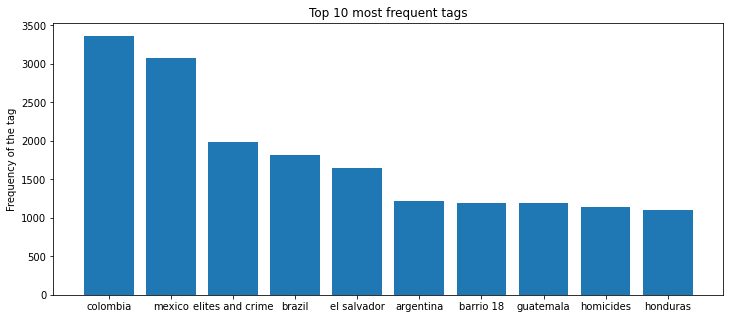

In [17]:
top10_tags = unique_tags[:10]

plt.figure(figsize=(12,5))
plt.bar(top10_tags["Tags"], top10_tags["Frequency"])
plt.ylabel("Frequency of the tag")
plt.title("Top 10 most frequent tags")
plt.show()

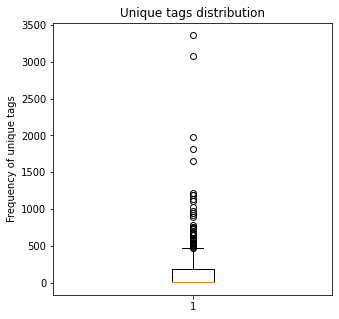

In [9]:
plt.figure(figsize=(5, 5))
plt.boxplot(unique_tags.Frequency)
plt.title("Unique tags distribution")
plt.ylabel("Frequency of unique tags")
plt.show()

In [10]:
df.sort_values(by=["Date"], inplace=True, ascending=True)
df = df.reset_index(drop=True)
df

,Date,Type,Title,Tags,Keywords,Author,drug_tag,crime_tag,mexico_tag,trafficking_tag,...,makes_tag,miners_tag,faction_tag,rico_tag,risk_tag,source_tag,pemex_tag,suggests_tag,overcrowding_tag,leyva_tag
0,2010-09-09 21:13:00+00:00,"[news, analysis]",17 Dead in Honduras Gang Massacre,"[argentina personalities, mexico, zetas, pcc, ...","[slaughter, factory, son, seeing, security, us...",insight crime,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-10-31 22:05:08+00:00,"[news, analysis]",Uruguay's Security Minister Feudalization of D...,"[brazil, x20, colombia, mexico personalities, ...","[trafficking, insight, security, criminal, cri...",insight crime,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-10-31 22:13:12+00:00,"[news, analysis]",Colombia Government 152 Gangs in Medellin,"[guatemala groups, oficina de envigado, guerre...","[city, colombia, states, work, report, transpo...",insight crime,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-10-31 22:15:08+00:00,"[news, analysis]","20,000 Migrants Kidnapped per year in Mexico","[mexico, zetas, walter overdick, homicides, x2...","[insight, work, crime, article, website, treac...",insight crime,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-10-31 22:17:04+00:00,"[news, analysis]",63pc of Mexican Municipalities 'Inflitrated' b...,"[honduras personalities, la familia michoacana...","[trafficking, weak, town, according, municipal...",insight crime,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,2021-12-13 14:27:23+00:00,[news],How Mexican Cartels Settled in Canada,"[brazil, el paisa, guatemala personalities, me...","[organized, group, settled, north, criminal, c...",alessandro ford,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10189,2021-12-13 19:36:23+00:00,[news],Could US Anti-Violence Models Work in Latin Am...,"[chepe luna, mexico, security policy, while sc...","[mexico, program, approach, antiviolence, mode...",kai bernierchen,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10190,2021-12-14 14:18:15+00:00,[news],Colombian Prosecutors Dismiss Memo Fantasma Li...,"[invisibles, while scrambling to save himself ...","[prosecutors, complaint, insight, libel, aceve...",insight crime,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10191,2021-12-14 19:13:22+00:00,[news],Did Anti-Drug Crusade Lead to Haiti President'...,"[contraband, zetas, haiti, cocaine, el salvado...","[presidents, trafficking, haiti, according, le...",parker asmann,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
